<a href="https://colab.research.google.com/github/shiwanshurahul/Movie-Recommendation-system/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
"""
   Project on Movie Recommmendation system on OTT Platforms like Netflix,Amazon Prime
   1. Content Based Recommendation system
   2. Popularity Based Recommendation system
   3. Collaboratie Recommendation system
     
"""

'\n   Project on Movie Recommmendation system on OTT Platforms like Netflix,Amazon Prime\n   1. Content Based Recommendation system\n   2. Popularity Based Recommendation system\n   3. Collaboratie Recommendation system\n     \n'

In [11]:
# Workflow -> Data -> Data pre-processing -> Feature Extraction -> user input 
# (Cosine similarity algorithm)                                                      

Importing the dependencies

In [27]:
import numpy as np
import pandas as pd
import difflib              #  to get close_match
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer is used to transform the textual data to numerical feature vector
# so then we can get cosine similarity values

from sklearn.metrics.pairwise import cosine_similarity   # to find similarity_score value

Data collection and Pre-processing

In [23]:
# loading the data from csv file to pandas dataframe
movies_data =pd.read_csv('/content/movies.csv')

In [24]:
# printing the first five rows of the dataframe
movies_data.head()               # head function prints first 5 rows 

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
# No of rows and columns in the dataframe
movies_data.shape

(4803, 24)

Analysis By Visualization

In [45]:
movies_data.groupby('title')['vote_average'].mean().sort_values(ascending = False).head()

title
Stiff Upper Lips            10.0
One Man's Hero               9.3
The Shawshank Redemption     8.5
There Goes My Baby           8.5
The Prisoner of Zenda        8.4
Name: vote_average, dtype: float64

In [46]:
movies_data.groupby('title')['vote_average'].count().sort_values(ascending = False).head()

title
The Host                         2
Out of the Blue                  2
(500) Days of Summer             1
Star Trek IV: The Voyage Home    1
St. Trinian's                    1
Name: vote_average, dtype: int64

In [51]:
ratings = pd.DataFrame(movies_data.groupby('title')['vote_average'].mean())
ratings.head()

,vote_average
title,
(500) Days of Summer,7.2
10 Cloverfield Lane,6.8
10 Days in a Madhouse,4.3
10 Things I Hate About You,7.3
102 Dalmatians,5.1


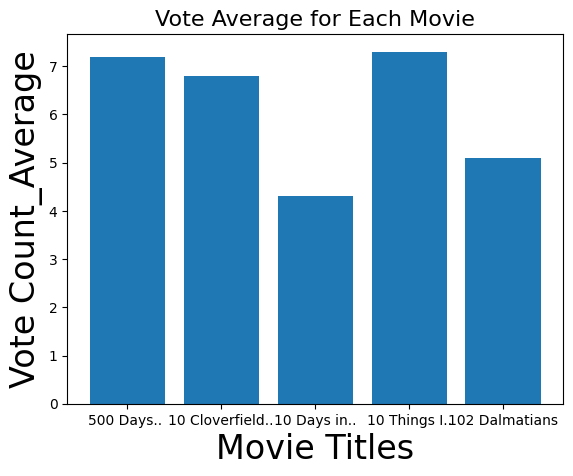

In [92]:
#ratings['numOfRatings'] = pd.DataFrame(movies_data.groupby('title')['vote_average'].count())
#ratings.head()
titles = ['500 Days.. ', '10 Cloverfield..', '10 Days in..', '10 Things I..', '102 Dalmatians']
vote_counts = [7.2, 6.8, 4.3, 7.3, 5.1]
# Create the bar plot
plt.bar(titles, vote_counts)

# Add labels and title
plt.xlabel('Movie Titles', fontsize=24)
plt.ylabel('Vote Count_Average', fontsize=24)
plt.title('Vote Average for Each Movie', fontsize=16)

# Show the plot
plt.show()


<Axes: >

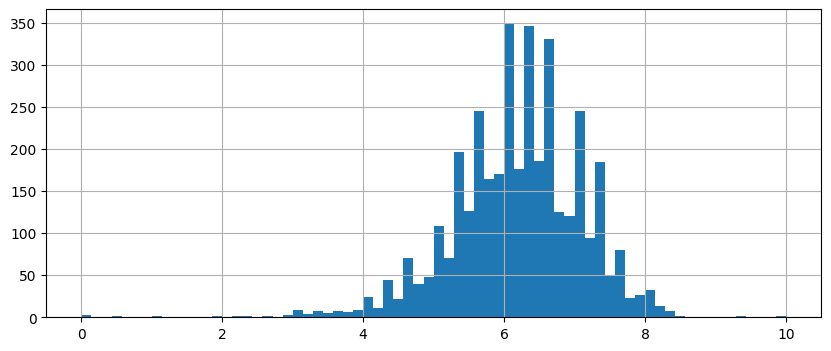

In [94]:
plt.figure(figsize = (10,4))
ratings['vote_average'].hist(bins = 70)

In [62]:
movies_data.groupby('budget')['popularity'].mean().sort_values(ascending = False).head()

budget
74000000     456.266787
165000000    171.103836
108000000    167.932870
237000000    150.437577
220000000    144.448633
Name: popularity, dtype: float64

In [63]:
movies_data.groupby('budget')['popularity'].count().sort_values(ascending = False).head()

budget
0           561
20000000    144
30000000    127
25000000    126
40000000    123
Name: popularity, dtype: int64

In [65]:
ratings1 = pd.DataFrame(movies_data.groupby('budget')['popularity'].mean())
ratings1.head()

,popularity
budget,
0,6.969299
4,0.740106
7,2.453742
10,7.111444
11,3.375208


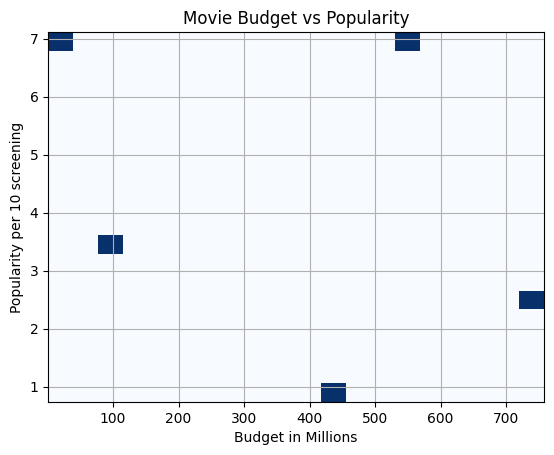

In [77]:


# data
budgets = [0.87, 454, 758, 568, 112]
popularity_scores = [6.969299, 0.740106, 2.453742, 7.111444, 3.375208]

# Create a histogram plot
plt.hist2d(budgets, popularity_scores, bins=[20, 20], cmap='Blues')

# Add labels and title
plt.xlabel('Budget in Millions')
plt.ylabel('Popularity per 10 screening')
plt.title('Movie Budget vs Popularity')

# Show the plot
plt.grid()
plt.show()



<Axes: >

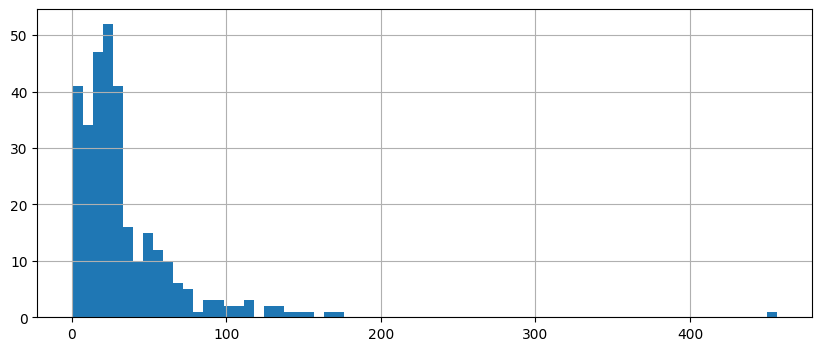

In [96]:
plt.figure(figsize = (10,4))
ratings1['popularity'].hist(bins = 70)

In [25]:
#selecting the relevant features for recommendation

selected_features =['genres', 'keywords', 'tagline', 'cast', 'director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [26]:
# replacing the null values with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [ ]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' ' +movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']


In [ ]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [ ]:
# converting the text data to feature vectors

vectorizer =TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [ ]:
# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
print(similarity.shape)

(4803, 4803)


 Asking user for input movies name

In [ ]:
movie_name = input('Enter your favourite movie name:')

Enter your favourite movie name:iron man


In [ ]:
# creating a list with all the movie names given in the dataset
list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles) 

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
# finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [ ]:
# take first value in the find_close_match list
close_match = find_close_match[0]
print(close_match)

Iron Man


In [ ]:
# finding the index of the movie with title
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

68


In [ ]:
# getting a list of similar movies 

similarity_score =list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)
# prints similarity_score of all the dataset

[(0, 0.033570748780675445), (1, 0.0546448279236134), (2, 0.013735500604224323), (3, 0.006468756104392058), (4, 0.03268943310073386), (5, 0.013907256685755473), (6, 0.07692837576335507), (7, 0.23944423963486405), (8, 0.007882387851851008), (9, 0.07599206098164225), (10, 0.07536074882460438), (11, 0.01192606921174529), (12, 0.013707618139948929), (13, 0.012376074925089967), (14, 0.09657127116284188), (15, 0.007286271383816743), (16, 0.22704403782296803), (17, 0.013112928084103857), (18, 0.04140526820609594), (19, 0.07883282546834255), (20, 0.07981173664799915), (21, 0.011266873271064948), (22, 0.006892575895462364), (23, 0.006599097891242659), (24, 0.012665208122549737), (25, 0.0), (26, 0.21566241096831154), (27, 0.030581282093826635), (28, 0.061074402219665376), (29, 0.014046184258938898), (30, 0.0807734659476981), (31, 0.31467052449477506), (32, 0.02878209913426701), (33, 0.13089810941050173), (34, 0.0), (35, 0.035350090674865595), (36, 0.03185325269937555), (37, 0.008024326882532318),

(index value , similarity)

In [ ]:
len(similarity_score)

4803

In [ ]:
# sorting the movies this based on their similarity, so we can find the most similar movies to recommend

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(68, 1.0000000000000002), (79, 0.40890433998005965), (31, 0.31467052449477506), (7, 0.23944423963486405), (16, 0.22704403782296803), (26, 0.21566241096831154), (85, 0.20615862984665329), (182, 0.19573956139611606), (511, 0.16702973947860686), (3623, 0.1609246088135586), (64, 0.15299924139445145), (203, 0.14818667948665118), (174, 0.1471993120942043), (4401, 0.14505971470107848), (101, 0.14401677581826294), (46, 0.14216268867232237), (169, 0.1380947013224906), (1740, 0.13624382641690763), (94, 0.1361681957902901), (788, 0.1330589507422922), (126, 0.13263982780511066), (131, 0.13137698586006535), (33, 0.13089810941050173), (2487, 0.12309731939910507), (783, 0.12162995562040377), (138, 0.11846458075866884), (2442, 0.11725512335483321), (661, 0.11719294096248463), (607, 0.11387063493435637), (38, 0.1126182690487113), (2651, 0.1121878787373205), (353, 0.1116846512704428), (122, 0.10850296033661253), (1553, 0.1079782217151326), (1451, 0.107849394974707), (242, 0.10630339022327012), (618, 0.

In [ ]:
# print the name of 30 most similar movies based on index

print('movies suggested for you:\n')

i=1
for movie in sorted_similar_movies:
  index =movie[0]
  title_from_index =movies_data[movies_data.index== index]['title'].values[0]
  if(i<31):
    print(i, '.', title_from_index)
    i+=1

movies suggested for you:

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . The Helix... Loaded
15 . X-Men: First Class
16 . X-Men: Days of Future Past
17 . Captain America: The First Avenger
18 . Kick-Ass 2
19 . Guardians of the Galaxy
20 . Deadpool
21 . Thor: The Dark World
22 . G-Force
23 . X-Men: The Last Stand
24 . Duets
25 . Mortdecai
26 . The Last Airbender
27 . Southland Tales
28 . Zathura: A Space Adventure
29 . Sky Captain and the World of Tomorrow
30 . The Amazing Spider-Man 2


Visualization based on outcome

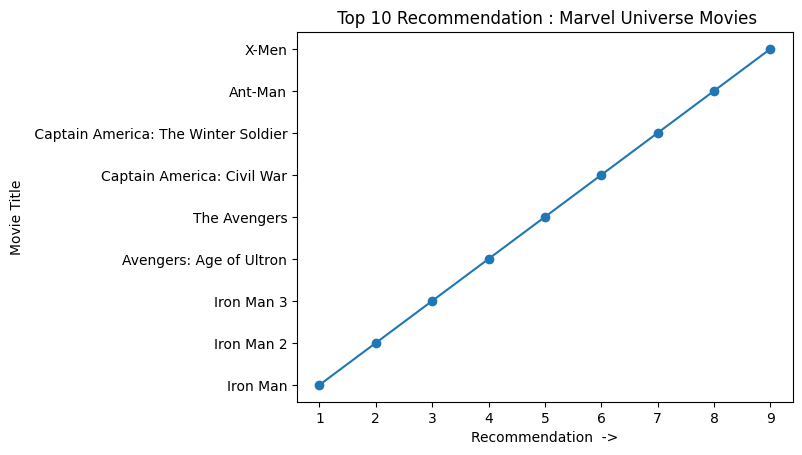

In [89]:

# derived data
movies = ['Iron Man', 'Iron Man 2', 'Iron Man 3', 'Avengers: Age of Ultron', 'The Avengers', 
'Captain America: Civil War',' Captain America: The Winter Soldier', 'Ant-Man','X-Men']
recommended_list = [1, 2, 3, 4, 5, 6,7,8,9]

# Create a line plot
plt.plot(recommended_list, movies, marker='o')

# Add labels and title
plt.xlabel('Recommendation  ->')
plt.ylabel('Movie Title')
plt.title(' Top 10 Recommendation : Marvel Universe Movies')

# Show the plot
plt.show()


Movie Recommedation System

In [ ]:
movie_name = input('Enter your favourite movie name :')
list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score =list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('movies suggested for you:\n')

i=1
for movie in sorted_similar_movies:
  index =movie[0]
  title_from_index =movies_data[movies_data.index== index]['title'].values[0]
  if(i<31):
    print(i, '.', title_from_index)
    i+=1


Enter your favourite movie name :batman
movies suggested for you:

1 . Batman
2 . Batman Returns
3 . Batman & Robin
4 . The Dark Knight Rises
5 . Batman Begins
6 . The Dark Knight
7 . A History of Violence
8 . Superman
9 . Beetlejuice
10 . Bedazzled
11 . Mars Attacks!
12 . The Sentinel
13 . Planet of the Apes
14 . Man of Steel
15 . Suicide Squad
16 . The Mask
17 . Salton Sea
18 . Spider-Man 3
19 . The Postman Always Rings Twice
20 . Hang 'em High
21 . Spider-Man 2
22 . Dungeons & Dragons: Wrath of the Dragon God
23 . Superman Returns
24 . Jonah Hex
25 . Exorcist II: The Heretic
26 . Superman II
27 . Green Lantern
28 . Superman III
29 . Something's Gotta Give
30 . Reds


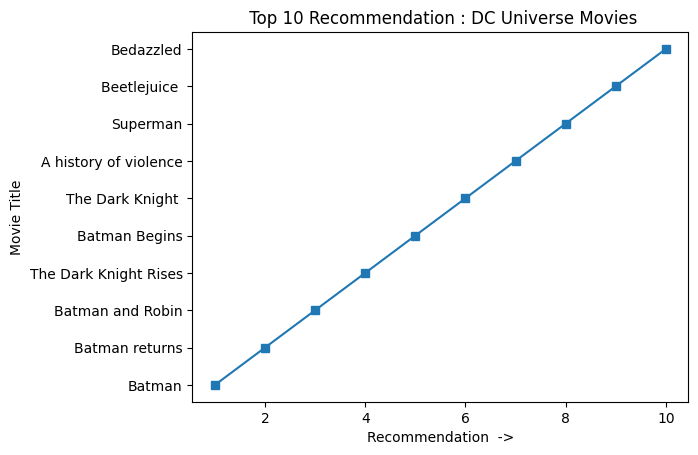

In [91]:
# derived data
movies = ['Batman', 'Batman returns', 'Batman and Robin', 'The Dark Knight Rises', 'Batman Begins', 
'The Dark Knight ','A history of violence', 'Superman','Beetlejuice ','Bedazzled']
recommended_list = [1, 2, 3, 4, 5, 6,7,8,9,10]

# Create a line plot
plt.plot(recommended_list, movies, marker='s')

# Add labels and title
plt.xlabel('Recommendation  ->')
plt.ylabel('Movie Title')
plt.title(' Top 10 Recommendation : DC Universe Movies')

# Show the plot
plt.show()
